In [16]:
import pandas as pd

In [17]:
tamil_train_data = pd.read_csv("tamil_train.tsv_cleaned.csv")
tamil_train_data.head()


,text,category
0,trailer late ah parthavanga like podunga,Positive
1,move pathutu vanthu trailer pakurvnga yaru,Positive
2,puthupetai dhanush ah yarellam pathinga,Positive
3,dhanush oda character puthu sa erukay mass ta,Positive
4,vera level ippa pesungada mokka nu thalaivaaaaaa,Positive


In [18]:
tamil_val_data = pd.read_csv("tamil_dev.tsv_cleaned.csv")
tamil_val_data.head()

,text,category
0,daily likes views pakka vanthavaga ellarukum ...,Positive
1,k dislikes ethuku da intha trailerku poi apdi...,Negative
2,lyca unna nenacha pavama iruku ya,Mixed_feelings
3,it looks like hindi movie amitab bachan,Positive
4,thalaivarukku nejamavey vayasaagiduchu sivaji ...,Positive


In [19]:
import matplotlib.pyplot as plt

In [20]:
tamil_train_data['category'].value_counts()

Positive          7627
Negative          1448
Mixed_feelings    1283
unknown_state      609
Name: category, dtype: int64

<Axes: >

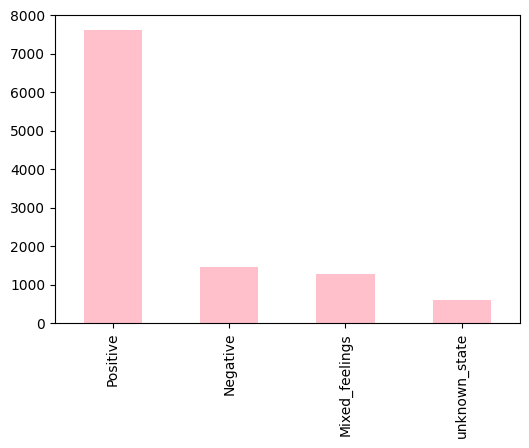

In [21]:
tamil_train_data['category'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [22]:
tamil_train_data.groupby('category').describe()

text         \
               count unique   
category                      
Mixed_feelings  1283   1274   
Negative        1448   1448   
Positive        7627   7532   
unknown_state    609    607   

                                                                        
                                                              top freq  
category                                                                
Mixed_feelings  caller tune la kola gaandla irukkaen mavana ko...    3  
Negative                    ivara pathta death vadi madiri irukku    1  
Positive                neraya neraya neraya neraya neraya neraya    6  
unknown_state            viswasam fastest k dislikes world record    2

In [23]:
tamil_test_data = pd.read_csv("tamil_test.tsv_cleaned.csv")
tamil_test_data.head()

,text,category
0,yarayellam fdfs ppga ippove ready agitinga,Positive
1,ennada viswasam mersal sarkar madhri time la l...,Positive
2,yuvan vera level ya valuable script sk in action,Positive
3,vayasulayum thanoda rasigargala sandhosapadut...,Mixed_feelings
4,all the best annatelugu makkal selvan fans,Positive


In [24]:
tamil_test_data.groupby('category').describe()

text         \
               count unique   
category                      
Mixed_feelings   377    377   
Negative         424    424   
Positive        2075   2067   
unknown_state    173    173   

                                                                        
                                                              top freq  
category                                                                
Mixed_feelings   vayasulayum thanoda rasigargala sandhosapadut...    1  
Negative        padu mokkai ean thalayai kooni kondu nikkuthu ...    1  
Positive        thalaivaa thalaivaa thalaivaa thalaivaa thalai...    2  
unknown_state   vera level next movie ida vida bayangaram ha i...    1

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=3000)  
X_train = tfidfconverter.fit_transform(tamil_train_data['text'].values).toarray()

In [26]:
X_val = tfidfconverter.transform(tamil_val_data['text'].values).toarray()
X_test = tfidfconverter.transform(tamil_test_data['text'].values).toarray()

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(tamil_train_data['category'].values)
le.classes_

array(['Mixed_feelings', 'Negative', 'Positive', 'unknown_state'],
      dtype=object)

In [28]:
Y_valid = le.transform(tamil_val_data['category'].values)
Y_test = le.transform(tamil_test_data['category'].values)

**BERNOULI NAIVE BAYES**

In [29]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)
print("Training Accuracy :" , accuracy_score(Y_train, bnb.predict(X_train)) )
predictions1 = bnb.predict(X_test)
#print(confusion_matrix(Y_test,predictions1))  
print(classification_report(Y_test,predictions1))  
print(" Test ACCURACY  : ",accuracy_score(Y_test, predictions1))

Training Accuracy : 0.743776784900155
              precision    recall  f1-score   support

           0       0.23      0.07      0.11       377
           1       0.41      0.32      0.36       424
           2       0.73      0.90      0.81      2075
           3       0.34      0.09      0.14       173

    accuracy                           0.67      3049
   macro avg       0.43      0.34      0.35      3049
weighted avg       0.60      0.67      0.62      3049

 Test ACCURACY  :  0.6723515906854707


**RANDOM FOREST**

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0, class_weight={0:0.117 ,1: 0.132 ,2:0.695 ,3: 0.056})  
rf.fit(X_train, Y_train)

print("Training Accuracy :" , accuracy_score(Y_train, rf.predict(X_train)) )

predictions2 = rf.predict(X_test)
#print(confusion_matrix(Y_test,predictions2))  
print(classification_report(Y_test,predictions2))  
print("TEST ACCURACY  : ",accuracy_score(Y_test, predictions2))

Training Accuracy : 0.9737394000182366
              precision    recall  f1-score   support

           0       0.15      0.07      0.09       377
           1       0.30      0.21      0.24       424
           2       0.72      0.87      0.79      2075
           3       0.22      0.09      0.13       173

    accuracy                           0.63      3049
   macro avg       0.34      0.31      0.31      3049
weighted avg       0.56      0.63      0.59      3049

TEST ACCURACY  :  0.632994424401443


**SVM**

In [31]:
from sklearn.svm import LinearSVC
sv = LinearSVC(class_weight={0:0.117 ,1: 0.132 ,2:0.695 ,3: 0.056})
sv.fit(X_train, Y_train)

print("Training Accuracy :" , accuracy_score(Y_train, sv.predict(X_train)) )

predictions3 = sv.predict(X_test)
#print(confusion_matrix(Y_test,predictions3))  
print(classification_report(Y_test,predictions3,zero_division=1))  
print(" TEST ACCURACY : ",accuracy_score(Y_test, predictions3))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy : 0.7306464849092733
              precision    recall  f1-score   support

           0       0.26      0.02      0.03       377
           1       0.49      0.11      0.17       424
           2       0.70      0.98      0.81      2075
           3       0.33      0.01      0.01       173

    accuracy                           0.69      3049
   macro avg       0.44      0.28      0.26      3049
weighted avg       0.59      0.69      0.58      3049

 TEST ACCURACY :  0.6854706461134799


**DECISION TREES**

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',splitter='best', class_weight={0:0.117 ,1: 0.132 ,2:0.695 ,3: 0.056},max_features=100)
dt.fit(X_train, Y_train)

print("Training Accuracy :" , accuracy_score(Y_train, dt.predict(X_train)) )

predictions4 = dt.predict(X_test)
#print(confusion_matrix(Y_test,predictions4))  
print(classification_report(Y_test,predictions4,zero_division=1))  
print("TEST ACCURACY SCORE : ",accuracy_score(Y_test, predictions4))

Training Accuracy : 0.9953496854198961
              precision    recall  f1-score   support

           0       0.19      0.13      0.15       377
           1       0.29      0.26      0.27       424
           2       0.74      0.80      0.77      2075
           3       0.15      0.12      0.14       173

    accuracy                           0.61      3049
   macro avg       0.34      0.33      0.33      3049
weighted avg       0.57      0.61      0.59      3049

TEST ACCURACY SCORE :  0.6061003607740243


**Ada Boost Classifier + Decision Tree**

In [33]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100 , base_estimator= dt)
abc.fit(X_train,Y_train)

print("Training Accuracy :" , accuracy_score(Y_train, abc.predict(X_train)) )

predictions5 = abc.predict(X_test)
print(confusion_matrix(Y_test,predictions5))
print(classification_report(Y_test,predictions5))
print("TEST ACCURACY : ",accuracy_score(Y_test, predictions5))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy : 0.9953496854198961
[[   5   17  354    1]
 [  13   37  369    5]
 [  22   35 2001   17]
 [   5    8  152    8]]
              precision    recall  f1-score   support

           0       0.11      0.01      0.02       377
           1       0.38      0.09      0.14       424
           2       0.70      0.96      0.81      2075
           3       0.26      0.05      0.08       173

    accuracy                           0.67      3049
   macro avg       0.36      0.28      0.26      3049
weighted avg       0.55      0.67      0.58      3049

TEST ACCURACY :  0.6726795670711708


In [34]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Assuming linear_svc is your LinearSVC model
# Convert LinearSVC to SVC with a linear kernel and enable probability estimation
sv2 = LinearSVC(class_weight={0:0.117 ,1: 0.132 ,2:0.695 ,3: 0.056})
clf = CalibratedClassifierCV(sv2) 
clf.fit(X_train, Y_train)
predictions100 = clf.predict(X_test)
#print(confusion_matrix(Y_test,predictions3))  
print(classification_report(Y_test,predictions100,zero_division=1))  
print(" TEST ACCURACY : ",accuracy_score(Y_test, predictions100))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

              precision    recall  f1-score   support

           0       0.33      0.00      0.01       377
           1       0.55      0.07      0.12       424
           2       0.69      0.99      0.81      2075
           3       0.43      0.02      0.03       173

    accuracy                           0.68      3049
   macro avg       0.50      0.27      0.24      3049
weighted avg       0.61      0.68      0.57      3049

 TEST ACCURACY :  0.6848146933420793


In [35]:
from sklearn.ensemble import VotingClassifier

# Assuming models is a list of your trained models
voting_clf = VotingClassifier(estimators=[('naive bayes', bnb), ('random forest', rf),('svm', clf),('decision tree', dt) ], voting='soft')
voting_clf.fit(X_train, Y_train)
ensemble_predictions1 = voting_clf.predict(X_test)
print(confusion_matrix(Y_test,ensemble_predictions1))
print(classification_report(Y_test,ensemble_predictions1))
print("TEST ACCURACY : ",accuracy_score(Y_test, ensemble_predictions1))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

[[  12   33  329    3]
 [  24   76  321    3]
 [  31   65 1966   13]
 [   3   10  142   18]]
              precision    recall  f1-score   support

           0       0.17      0.03      0.05       377
           1       0.41      0.18      0.25       424
           2       0.71      0.95      0.81      2075
           3       0.49      0.10      0.17       173

    accuracy                           0.68      3049
   macro avg       0.45      0.32      0.32      3049
weighted avg       0.59      0.68      0.60      3049

TEST ACCURACY :  0.6795670711708757


In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming models is a list of your trained models
# meta_model is the model that combines predictions
stacked_clf = StackingClassifier(estimators=[('naive bayes', bnb), ('random forest', rf),('svm', sv),('decision tree', dt) ], final_estimator=LogisticRegression())
stacked_clf.fit(X_train, Y_train)
ensemble_predictions2 = stacked_clf.predict(X_test)
print(confusion_matrix(Y_test,ensemble_predictions2))
print(classification_report(Y_test,ensemble_predictions2))
print("TEST ACCURACY : ",accuracy_score(Y_test, ensemble_predictions2))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

[[   4   27  346    0]
 [   2   71  351    0]
 [   1   44 2016   14]
 [   1    3  160    9]]
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       377
           1       0.49      0.17      0.25       424
           2       0.70      0.97      0.81      2075
           3       0.39      0.05      0.09       173

    accuracy                           0.69      3049
   macro avg       0.52      0.30      0.29      3049
weighted avg       0.63      0.69      0.60      3049

TEST ACCURACY :  0.6887504099704821
